### Name : Raman Kumar

### LetsGrow More


# Create the Decision Tree classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
#Load Important Libraries

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Set Working Directory 

In [2]:
os.chdir('C:\Internships & Projects\Lets Grow More Internship\Intermediate Level\Project 2')

#### Load The data 

In [3]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Descriptive Statistics 

In [4]:
data.shape

(150, 6)

In [5]:
#drop the ID column

data = data.drop("Id", axis=1)

In [6]:
data.describe().style.background_gradient(cmap = 'copper')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Missing Value Analysis 

In [8]:
missing_val = data.isna().sum()
missing_val

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No Missing Value

#### EDA

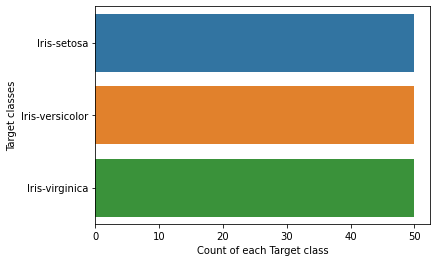

In [9]:
# target Class Count
sns.countplot(y=data.Species ,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

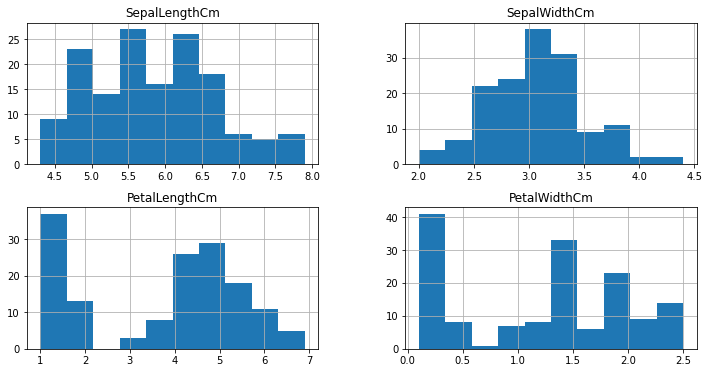

In [10]:
#Distribution of length & Width

data.hist()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

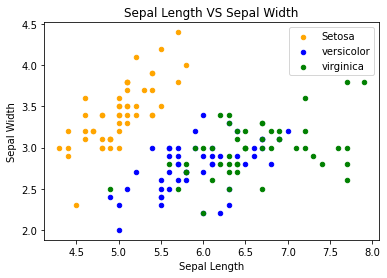

In [11]:
#Sepal Length VS Sepal Width
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Sepal Width")
plt.show()

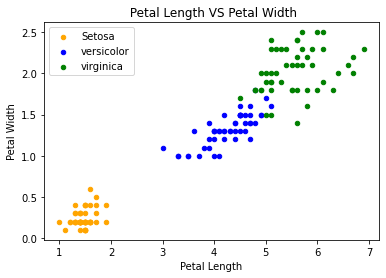

In [12]:
#Petal Length VS Petal Width
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Petal Width")
plt.show()

we can see that the Petal Features are giving a better cluster division compared to the Sepal features.  

#### Correlation Analysis 

In [13]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


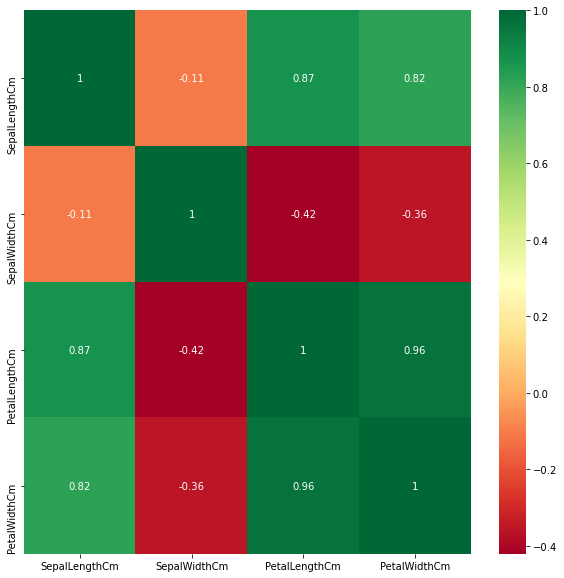

In [14]:
plt.figure(figsize=(10,10))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn') 

### Machine Learning 

#### Label Encoding the target class as ML deals only with Numerical features 

In [15]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['Species']= label_encoder.fit_transform(data['Species'])
 
data['Species'].unique()

array([0, 1, 2])

### Train Test Split 

In [16]:
# Dividing data into Train and Test
from sklearn.model_selection import train_test_split , cross_val_score
X = data.drop('Species', axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### Scaling The Data 

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### DecisionTreeClassifier 

In [18]:
from sklearn.tree import DecisionTreeClassifier

dfc = DecisionTreeClassifier()
dfc.fit(X_train, y_train)
y_pred = dfc.predict(X_test)

### Model Evaluation 

[[18  0  0]
 [ 0 10  0]
 [ 0  3 14]]
0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



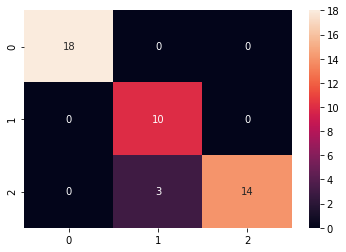

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm= confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Graphical Representation 

[Text(167.40000000000003, 199.32, 'X[2] <= -0.813\ngini = 0.663\nsamples = 105\nvalue = [32, 40, 33]'),
 Text(133.92000000000002, 163.07999999999998, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(200.88000000000002, 163.07999999999998, 'X[3] <= 0.704\ngini = 0.495\nsamples = 73\nvalue = [0, 40, 33]'),
 Text(133.92000000000002, 126.83999999999999, 'X[2] <= 0.887\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(100.44000000000001, 90.6, 'X[0] <= -1.098\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(66.96000000000001, 54.359999999999985, 'X[3] <= 0.161\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(167.40000000000003, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.

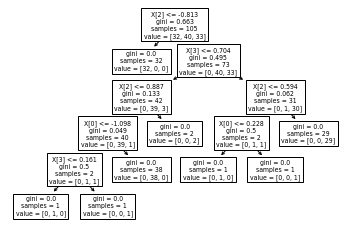

In [20]:
from sklearn import tree
tree.plot_tree(dfc) 

#### Visualizing Decision Tree using graphviz library 

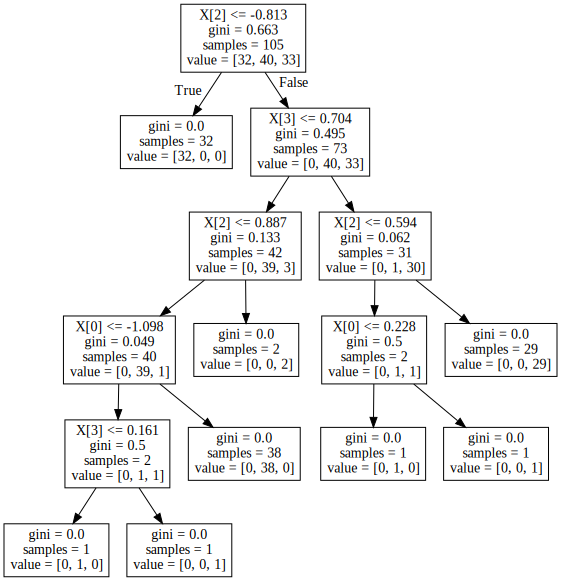

In [21]:
import graphviz

dot_data = tree.export_graphviz(dfc, out_file = None)

graph = graphviz.Source(dot_data)
graph

##### Thank You